In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/home/onyxia/work/python-DATA/API_NY.GDP.PCAP.CD_DS2_fr_csv_v2_11820.csv")


# 2. Garder uniquement les colonnes utiles
colonnes_utiles = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'] + [str(annee) for annee in range(1960, 2025)]
df = df[colonnes_utiles]

# 3. Filtrer pour garder uniquement le PIB par habitant
# (le code de l'indicateur pour le PIB par habitant est NY.GDP.PCAP.CD)
df_pib = df[df['Indicator Code'] == 'NY.GDP.PCAP.CD']

# 4. Supprimer les colonnes inutiles maintenant
df_pib = df_pib.drop(columns=['Indicator Name', 'Indicator Code'])

# 5. Réorganiser le tableau : on veut un format long (facile pour les graphiques)
df_long = df_pib.melt(id_vars=['Country Name', 'Country Code'], 
                      var_name='Year', 
                      value_name='GDP_per_capita_USD')

# 6. Nettoyer les données : convertir l’année en nombre et le PIB en float
df_long['Year'] = df_long['Year'].astype(int)
df_long['GDP_per_capita_USD'] = pd.to_numeric(df_long['GDP_per_capita_USD'], errors='coerce')

# 7. supprimer les lignes sans valeur
df_long = df_long.dropna(subset=['GDP_per_capita_USD'])

df_long.to_csv("PIB_par_habitant_nettoye.csv", index=False)

print(df_long.head(20))

FileNotFoundError: [Errno 2] No such file or directory: '/home/onyxia/work/python-DATA/API_NY.GDP.PCAP.CD_DS2_fr_csv_v2_11820.csv'

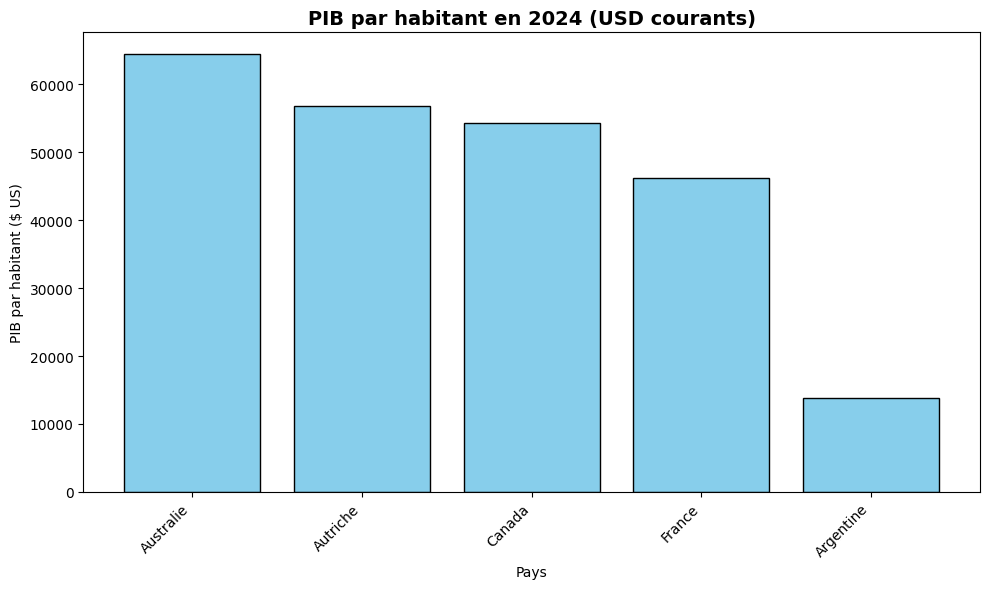

In [5]:
# Graphique comparatif en barres : PIB par habitant en 2024
pays_selectionnes = ['Argentine', 'Australie', 'Autriche', 'France', 'Canada']
annee = 2024

# Filtrer les données pour l'année choisie
df_annee = df_long[(df_long['Year'] == annee) & (df_long['Country Name'].isin(pays_selectionnes))]

# Trier les pays par PIB décroissant pour un graphique plus lisible
df_annee = df_annee.sort_values(by='GDP_per_capita_USD', ascending=False)

# Créer le graphique
plt.figure(figsize=(10, 6))
plt.bar(df_annee['Country Name'], df_annee['GDP_per_capita_USD'], color='skyblue', edgecolor='black')

# Ajouter les titres et labels
plt.title(f"PIB par habitant en {annee} (USD courants)", fontsize=14, fontweight='bold')
plt.xlabel("Pays")
plt.ylabel("PIB par habitant ($ US)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Afficher le graphique
plt.show()
